## multiple linear regression

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


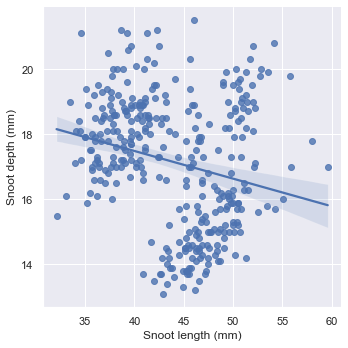

In [180]:
import seaborn as sns
sns.set_theme()
# %matplotlib widget

# Load the penguins dataset
penguins = sns.load_dataset("penguins")
print(penguins.head())
# Plot relation of snoot lenght and depth depending on species
g = sns.lmplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

Same data, split up by species:

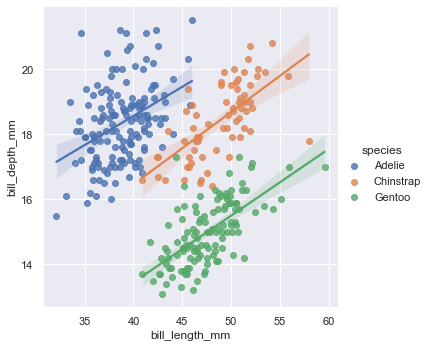

In [102]:
# Plot relation of snoot lenght and depth depending on species
g = sns.lmplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    height=5
)

## Support Vector Machines


[Documentation](https://scikit-learn.org/stable/modules/svm.html)

In [217]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

import pandas as pd
penguins2=penguins.copy()[penguins["species"]!= "Chinstrap"]
X = penguins2.dropna()[["bill_length_mm", "bill_depth_mm"]]
y = penguins2.dropna()["species"]



scaler = StandardScaler()
X.iloc[:] = scaler.fit_transform(X)

#encode strings as integers
y=y.astype("category").cat.codes


print(X[:5])
print(y[:5])

   bill_length_mm  bill_depth_mm
0       -0.701364       0.925911
1       -0.624514       0.277848
2       -0.470814       0.576954
4       -1.162463       1.225017
5       -0.662939       1.873079
0    0
1    0
2    0
4    0
5    0
dtype: int8


In [218]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

clf = svm.SVC(kernel= "linear")
clf.fit(X_train,y_train)


SVC(kernel='linear')

In [219]:
y_pred = clf.predict(X_test)

In [220]:
from sklearn.metrics import classification_report, confusion_matrix 

print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))




Confusion Matrix:
 [[37  0]
 [ 0 30]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        30

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



IndexError: index 1 is out of bounds for axis 0 with size 1

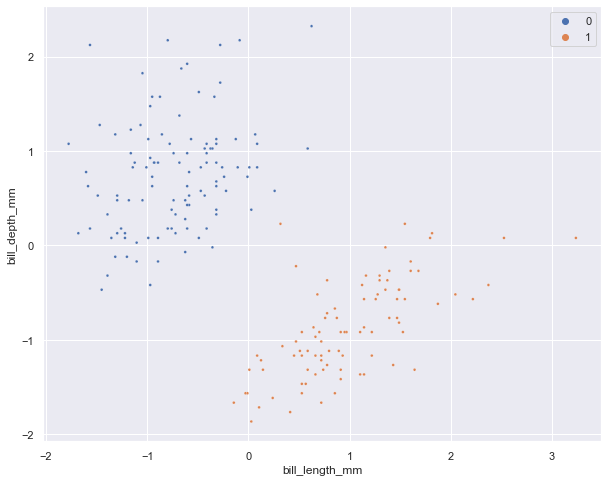

In [227]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.figure(figsize=(10, 8))
# # Plotting our two-features-space
# sns.scatterplot(x=X_test.iloc[:, 0], 
#                 y=X_test.iloc[:, 1], 
#                 hue=y_pred, 
#                 s=20);

# print(clf.coef_)
# # Constructing a hyperplane using a formula.
# w = clf.coef_[0]           # w consists of 2 elements
# b = clf.intercept_[0]      # b consists of 1 element
# x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
# y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# # # Plotting a red hyperplane
# # plt.plot(x_points, y_points, c='r');

In [108]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn import svm, datasets

# # import some data to play with
# iris = datasets.load_iris()
# X = iris.data[:, :2]  # we only take the first two features. We could
#                       # avoid this ugly slicing by using a two-dim dataset
# y = iris.target

# h = .02  # step size in the mesh

# # we create an instance of SVM and fit out data. We do not scale our
# # data since we want to plot the support vectors
# C = 1.0  # SVM regularization parameter
# svc = svm.SVC(kernel='linear', C=C).fit(X, y)
# rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
# poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
# lin_svc = svm.LinearSVC(C=C).fit(X, y)

# # create a mesh to plot in
# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                      np.arange(y_min, y_max, h))

# # title for the plots
# titles = ['SVC with linear kernel',
#           'LinearSVC (linear kernel)',
#           'SVC with RBF kernel',
#           'SVC with polynomial (degree 3) kernel']


# for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
#     # Plot the decision boundary. For that, we will assign a color to each
#     # point in the mesh [x_min, x_max]x[y_min, y_max].
#     plt.subplot(2, 2, i + 1)
#     plt.subplots_adjust(wspace=0.4, hspace=0.4)

#     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

#     # Put the result into a color plot
#     Z = Z.reshape(xx.shape)
#     plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

#     # Plot also the training points
#     plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
#     plt.xlabel('Sepal length')
#     plt.ylabel('Sepal width')
#     plt.xlim(xx.min(), xx.max())
#     plt.ylim(yy.min(), yy.max())
#     plt.xticks(())
#     plt.yticks(())
#     plt.title(titles[i])

# plt.show()

SVC(kernel='linear', random_state=32)

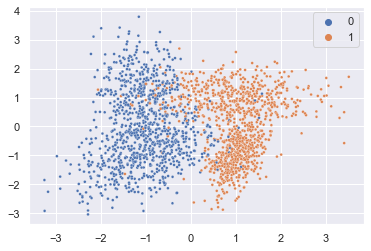

In [229]:
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_classification
# Creating a random dataset of 2,000 samples and only 2 features
# (for 2–dimensional space). And yeah, it's a binary classification
# here (`y` contains two classes: 0 and 1).
X, y = make_classification(n_samples=2000, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_classes=2,
                           random_state=32)
sns.scatterplot(x=X[:, 0], 
                y=X[:, 1], 
                hue=y, 
                s=8);
# Splitting our dataset by train and test parts.
# `stratify` is here to make our splitting balanced
# in terms of classes.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                   test_size=0.3, stratify=y,
                                   random_state=32)
# And here we train our model. IMPORTANT: we use kernel='linear'.
svc_model = SVC(kernel='linear', random_state=32)
svc_model.fit(X_train, y_train)

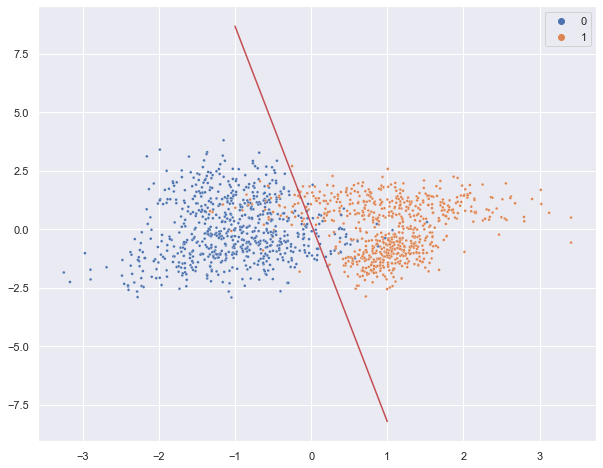

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=X_train[:, 0], 
                y=X_train[:, 1], 
                hue=y_train, 
                s=8);
# Constructing a hyperplane using a formula.
w = svc_model.coef_[0]           # w consists of 2 elements
b = svc_model.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');